<a href="https://colab.research.google.com/github/kokchun/Deep-learning-AI21/blob/main/Lectures/Lec2.0-Image_kernels.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; for interacting with the code


---
# Lecture notes - Image kernels
---

This is the lecture note for **image kernels** which is the main component in convolutional neural networks (CNN). 

<p class = "alert alert-info" role="alert"><b>Note</b> that this lecture note gives a brief introduction to image kernels and image preprocessing. I encourage you to read further about image kernels. </p>

Read more:

- [Image kernels explained visually - setosa.io](https://setosa.io/ev/image-kernels/)
- [Kernel image processing - wikipedia](https://en.wikipedia.org/wiki/Kernel_(image_processing))

---

## Paths

We will later read and write image data to different directories, so it is important to understand how paths work. Note that there is a difference in how to work with paths in Jupyter notebook in contrast with Python script when we work in Visual studio code. 

- in Jupyter notebook the path is relative to where the file is
- in Python script when we click the play button it is relative to the working directory in the terminal 

In [1]:
import cv2

In [2]:

import numpy as np
import matplotlib.pyplot as plt 
import os

plt.style.use("seaborn-white")
# add this line of code in Python script and it will be the same as when you run from Jupyter notebook
# here we change the directory to where the script is
# os.chdir(os.path.dirname(__file__))

# this gives absolute path to the directory where this notebook is situated
# in Python script this path gives you where you are in the terminal
current_dir = os.path.abspath("")
print(f"{current_dir=}")

# gives a list of stuffs in current folder, same as ls in terminal
files_current_dir = os.listdir(current_dir)
print(f"{files_current_dir=}")


data_dir = os.path.abspath("../Data/")
print(f"{data_dir=}")

os.listdir(data_dir)

current_dir='c:\\Users\\YunaLiu-AIU21GBG\\Documents\\GitHub\\deep-learning-Yuna-Liu\\Lectures-edited'
files_current_dir=['Lec0-MLP_regression.ipynb', 'Lec0.1-MLP_classification.ipynb', 'Lec1-MLP_image_classification.ipynb', 'Lec2.0-Image_kernels.ipynb']
data_dir='c:\\Users\\YunaLiu-AIU21GBG\\Documents\\GitHub\\deep-learning-Yuna-Liu\\Data'


['Homer_Simpson_2006.png', 'processed_images']

Original shape (390, 190, 4)


(195, 95, 4)

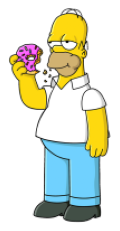

In [7]:
img = plt.imread(f"{data_dir}/Homer_Simpson_2006.png")
print(f"Original shape {img.shape}")

# want to make it smallers
resize_factor = .5
new_size = (int(img.shape[1]*resize_factor), int(img.shape[0]*resize_factor))

img = cv2.resize(img, new_size)
plt.imshow(img)
plt.axis("off");
img.shape

---
## Image kernels 

Image kernel or image filter is a matrix that can be applied to an image through a convolution operation, which works like a sliding dot-product. By convolving an image with a kernel, features are extracted from the image. There are several kernels that humans have designed to perform different filters on an image, e.g. blurring, edge, sharpen, ... 

For example edge filter

$$K=\begin{pmatrix}
    0 &-1 &0 \\
    -1 &4 &-1 \\
    0 &-1 &0 \\
\end{pmatrix}$$

We can convolve it with the image $A$: 

$$A*K = 
\begin{pmatrix}
    0 &1 &0 & 0\\
    0 &1 &0 & 0\\
    0 &1 &0 & 0\\
    0 &1 &0 & 0\\
\end{pmatrix}*
\begin{pmatrix}
    0 &-1 &0 \\
    -1 &4 &-1 \\
    0 &-1 &0 \\
\end{pmatrix} = \begin{pmatrix}
    2 & -1 \\
    2 & -1
\end{pmatrix}
$$

Here we used stride (1,1), which means that the window is moved one step and calculates the dot product, then moves another 1 step to compute dot product again.

We note that the convolved image becomes smaller, so if we want to keep the same size as original image we need to pad it with zeros, yes we will lose information in the borders. 

In [14]:
edge_filter = np.array([[0, -1, 0],
                        [-1, 4, -1],
                        [0, -1, 0]])

blur_filter = np.array([[.0625, .125, .0625],
                        [.125, .25, .125],
                        [.0625, .125, .0625]])

# adjust the values of the filter and see different effects
outline_filter = np.array([[-1, -1, -1],
                           [-1, 6, -1],
                           [-1, -1, -1]])

filters = [edge_filter, blur_filter, outline_filter]
filter_names = ["Edge", "Blur", "Outline"]

In [8]:
processed_images_path = f"{data_dir}/processed_images"
# create the folder processed_images inside data folder
try: 
    os.mkdir(processed_images_path)
except FileExistsError as err:
    print("Already created folder")

Already created folder


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


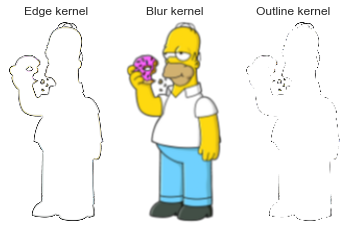

In [20]:
fig, axes = plt.subplots(1,len(filters))

for ax, filter, filter_name in zip(axes, filters, filter_names):
    filtered_img = cv2.filter2D(img, -1, kernel = filter)
    # Value -1 represents that the resulting image will have same depth as the source image. 
    # kernel: kernel is the filter matrix applied on the image. 
    # More formally, filter2D () function convolves an image with the kernel 
    # which results in an image becoming blur or sharpen and enhances the image features.
    ax.imshow(filtered_img)
    ax.axis("off")
    ax.set(title = f"{filter_name} kernel")

fig.savefig(f"{processed_images_path}/Filered_images.png")

In [16]:
import shutil

source_path = f"{processed_images_path}/Filered_images.png"
target_path = f"{processed_images_path}/Filtered_images_copied.png"
shutil.copyfile(source_path, target_path)

'c:\\Users\\YunaLiu-AIU21GBG\\Documents\\GitHub\\deep-learning-Yuna-Liu\\Data/processed_images/Filtered_images_copied.png'